In [0]:
%matplotlib inline

In [0]:
!pip install -q kaggle

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kshitijalwadhi","key":"867eb86b7df9e0190a9623065cdde2a8"}'}

In [0]:
!mkdir ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c invasive-species-monitoring

  0% 0.00/6.19k [00:00<?, ?B/s]
100% 6.19k/6.19k [00:00<00:00, 6.17MB/s]
100% 1.98G/1.98G [00:33<00:00, 19.2MB/s]
100% 1.98G/1.98G [00:33<00:00, 62.7MB/s]
100% 1.14G/1.14G [00:17<00:00, 38.9MB/s]
100% 1.14G/1.14G [00:17<00:00, 68.2MB/s]
  0% 0.00/4.18k [00:00<?, ?B/s]
100% 4.18k/4.18k [00:00<00:00, 4.37MB/s]


In [0]:
mkdir data

In [11]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [12]:
!p7zip -d train.7z -o /content/data/train


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2126278821 bytes (2028 MiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 2126278821
Headers Size = 24792
Method = LZMA2:24
Solid = +
Blocks = 2

  0%      0% 1        0% 4 - train/1000.jpg                         0% 8 - train/1004.jpg                         0% 13 - train/1009.jpg                          0% 14 - train/101.jpg                         0% 17 - train/1012.jpg                          1% 21 - train/1016.jpg

In [13]:
!p7zip -d test.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 1227586386 bytes (1171 MiB)

Extracting archive: test.7z
--
Path = test.7z
Type = 7z
Physical Size = 1227586386
Headers Size = 16731
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 6 - test/1002.jpg                        0% 11 - test/1007.jpg                         1% 17 - test/1012.jpg                         1% 23 - test/1018.jpg                         1% 28 - test/1022.jpg                         2% 32 - test/1026.jpg                       

In [14]:
!unzip train_labels.csv.zip

Archive:  train_labels.csv.zip
  inflating: train_labels.csv        
   creating: __MACOSX/
  inflating: __MACOSX/._train_labels.csv  


In [15]:
pd.read_csv('train_labels.csv')

name  invasive
0        1         0
1        2         0
2        3         1
3        4         0
4        5         1
...    ...       ...
2290  2291         1
2291  2292         1
2292  2293         1
2293  2294         1
2294  2295         1

[2295 rows x 2 columns]

In [0]:
path = '/content'

In [0]:
data = ImageDataBunch.from_csv(path,csv_labels='train_labels.csv',ds_tfms=get_transforms(),folder='train',suffix='.jpg',valid_pct=0.2,size=224)

In [23]:
data.classes

[0, 1]

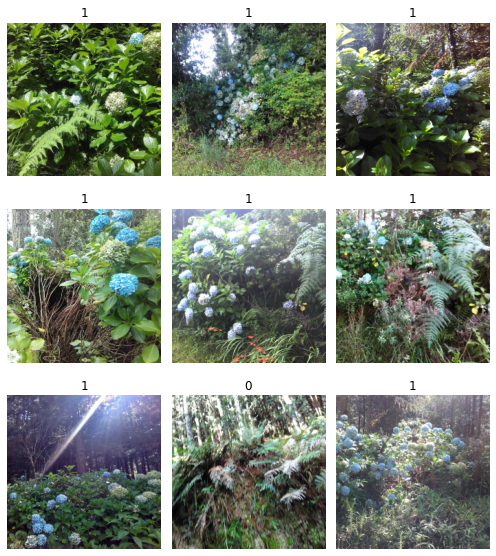

In [24]:
data.show_batch(rows=3, figsize=(7,8))

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [26]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

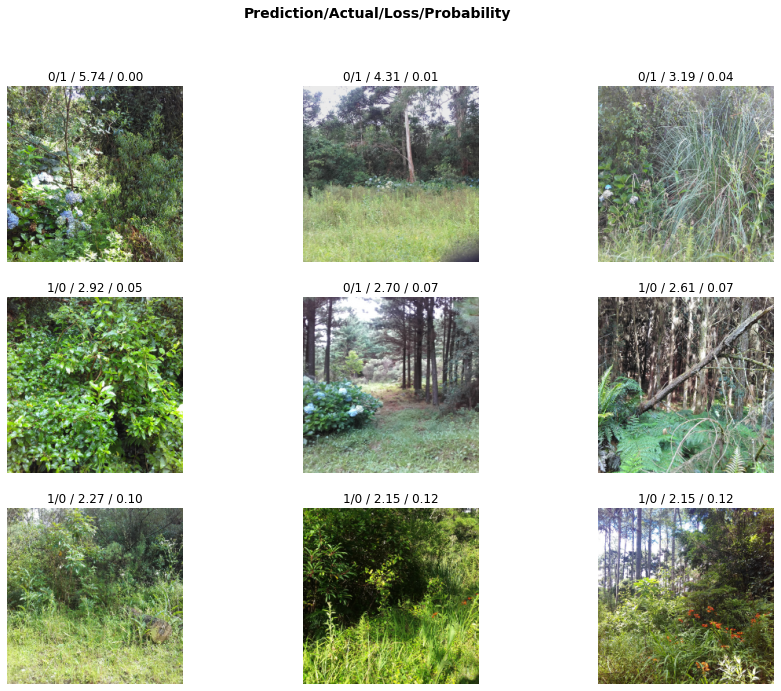

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
learn.unfreeze()

In [31]:
learn.fit_one_cycle(1)

In [0]:
learn.save('stage-2')

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


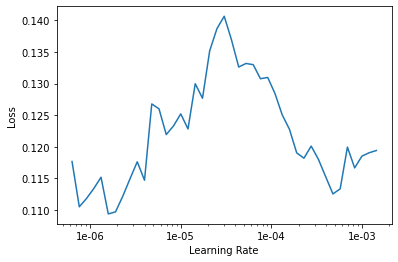

In [34]:
learn.recorder.plot()

In [35]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(8e-5,9e-4))

In [0]:
learn.save('stage-3')

In [39]:
learn.unfreeze()
learn.fit_one_cycle(1, max_lr=slice(8e-5,9e-4))

In [0]:
learn.save('final')

In [0]:
learn.export()

In [61]:
test = ImageList.from_folder(os.path.join(path, 'test'))
learner = load_learner(path, test=test)
preds, _ = learner.get_preds(ds_type=DatasetType.Test)

In [62]:
preds.shape

torch.Size([1531, 2])

In [52]:
cd /content/test

/content/test


In [53]:
!ls -l | wc -l

1532


In [54]:
cd /content

/content


In [63]:
preds

tensor([[9.9754e-01, 2.4618e-03],
        [1.0000e+00, 1.4452e-06],
        [9.9946e-01, 5.3727e-04],
        ...,
        [1.6323e-01, 8.3677e-01],
        [9.9597e-01, 4.0284e-03],
        [9.9998e-01, 1.4986e-05]])

In [64]:
raw_submission = {'name': [], 'invasive': preds[:,1]}
for i in range(1,1532):
  raw_submission['name'].append(i)

submission = pd.DataFrame(raw_submission, columns=['name', 'invasive'])
submission.to_csv(r'/content/submission.csv', index = False)
submission.head()

name  invasive
0     1  0.002462
1     2  0.000001
2     3  0.000537
3     4  0.000009
4     5  0.994478

In [60]:
!kaggle competitions submit -c invasive-species-monitoring -f submission.csv -m "First try"

100% 24.3k/24.3k [00:01<00:00, 12.6kB/s]
Successfully submitted to Invasive Species Monitoring